42

the index is 500674
(100, 3)


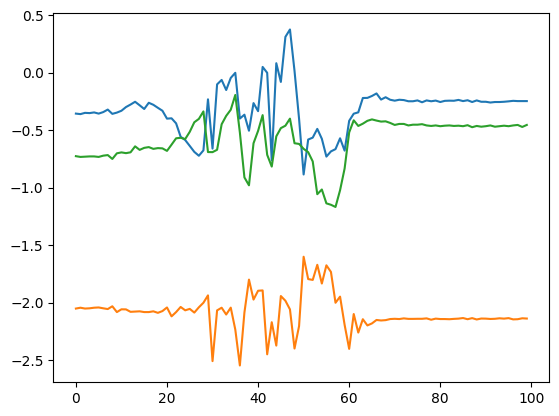

In [20]:

import random
import h5py
import numpy as np
import matplotlib.pyplot as plt

root = "/niddk-data-central/iWatch/pre_processed_seg/H/train.hdf5"
with h5py.File(root, "r") as f:
    # max_idx = f['x'].shape[0]
    # idx = random.randint(0, max_idx - 1)
    idx = 500674
    print('the index is', idx)
    sample = f['x'][idx]   # (100, 3)
    print(sample.shape)


sample = np.transpose(sample, (1, 0))  # (3, 100)
sample = sample/np.mean(np.abs(sample))  # (3, 100)
plt.plot(sample[0])
plt.plot(sample[1])
plt.plot(sample[2])

    

In [ ]:
1130550,500674

In [4]:

import random
import h5py
import numpy as np
# import matplotlib.pyplot as plt

root = "/niddk-data-central/iWatch/pre_processed_seg/H/val.hdf5"
with h5py.File(root, "r") as f:
    print(f['x'].shape)
    # max_idx = f['x'].shape[0]
    # idx = random.randint(0, max_idx - 1)
#     idx = 500674
#     print('the index is', idx)
#     sample = f['x'][idx]   # (100, 3)
#     print(sample.shape)


# sample = np.transpose(sample, (1, 0))  # (3, 100)
# sample = sample/np.mean(np.abs(sample))  # (3, 100)
# plt.plot(sample[0])
# plt.plot(sample[1])
# plt.plot(sample[2])

    

(394842, 100, 3)


In [5]:

import random
import h5py
import numpy as np
# import matplotlib.pyplot as plt

root = "/niddk-data-central/iWatch/pre_processed_seg/W/val.hdf5"
with h5py.File(root, "r") as f:
    print(f['x'].shape)
    # max_idx = f['x'].shape[0]
    # idx = random.randint(0, max_idx - 1)
#     idx = 500674
#     print('the index is', idx)
#     sample = f['x'][idx]   # (100, 3)
#     print(sample.shape)


# sample = np.transpose(sample, (1, 0))  # (3, 100)
# sample = sample/np.mean(np.abs(sample))  # (3, 100)
# plt.plot(sample[0])
# plt.plot(sample[1])
# plt.plot(sample[2])

    

(404292, 100, 3)


In [14]:

import random
import h5py
import numpy as np
import matplotlib.pyplot as plt

root = "/niddk-data-central/iWatch/pre_processed_seg/HW/train_merged_data.h5"
with h5py.File(root, "r") as f:
    # max_idx = f['x'].shape[0]
    # idx = random.randint(0, max_idx - 1)
    print(f.keys())
    print(f['subject_id'].shape)
    print(f['timestamp'].shape)
    print(f['x'].shape)
    print(f['y'].shape)
    idx = 1
#     print('the index is', idx)
#     sample = f['x'][idx]   # (100, 3)
#     print(sample.shape)


# sample = np.transpose(sample, (1, 0))  # (3, 100)
# sample = sample/np.mean(np.abs(sample))  # (3, 100)
# plt.plot(sample[0])
# plt.plot(sample[1])
# plt.plot(sample[2])
# plt.plot(sample[3])
# plt.plot(sample[4])
# plt.plot(sample[5])

    

<KeysViewHDF5 ['subject_id', 'timestamp', 'x', 'y']>
(1967849,)
(1967849,)
(1967849, 100, 6)
(1967849,)


In [20]:
import random
import h5py
import numpy as np
# import matplotlib.pyplot as plt

root = "/niddk-data-central/iWatch/pre_processed_seg/H/10s_val.h5"
with h5py.File(root, "r") as f:
    print(f['x'].shape)
    print(f.keys())
    print(f['subject_id'].shape)
    # max_idx = f['x'].shape[0]
    # idx = random.randint(0, max_idx - 1)
#     idx = 500674
#     print('the index is', idx)
#     sample = f['x'][idx]   # (100, 3)
#     print(sample.shape)


# sample = np.transpose(sample, (1, 0))  # (3, 100)
# sample = sample/np.mean(np.abs(sample))  # (3, 100)
# plt.plot(sample[0])
# plt.plot(sample[1])
# plt.plot(sample[2])

    

(394842, 100, 3)
<KeysViewHDF5 ['subject_id', 'timestamp', 'x', 'y']>
(394842,)


In [3]:

import random
import h5py
import numpy as np
# import matplotlib.pyplot as plt

root = "/niddk-data-central/iWatch/pre_processed_seg/W/10s_val.h5"
with h5py.File(root, "r") as f:
    print(f['x'].shape)
    print(f.keys())
    timestamp = f['timestamp'][:]


    

(404292, 100, 3)
<KeysViewHDF5 ['subject_id', 'timestamp', 'x', 'y']>


In [6]:
from datetime import datetime

# Convert the first timestamp to a human-readable format
datetime.fromtimestamp(timestamp[0])

datetime.datetime(2013, 8, 15, 15, 38)

In [ ]:
"""
my prediction_file is like /niddk-data-central/leo_workspace/iwatch_W/val_result/zeroshot_prediction/CHAP_ALL_ADULTS/i0001A.csv
each csv file looks like:
segment,timestamp,prediction
0,2013-04-23 12:12:00,sitting
0,2013-04-23 12:12:10,sitting
0,2013-04-23 12:12:20,not-sitting

my ground truth file is in root = "/niddk-data-central/iWatch/pre_processed_seg/W/10s_val.h5"
help to align the two files with f['subject_id'] and f['timestamp']

"""

'\nmy prediction_file is like /niddk-data-central/leo_workspace/iwatch_W/val_result/zeroshot_prediction/CHAP_ALL_ADULTS/i0001A.csv\neach csv file looks like:\nsegment,timestamp,prediction\n0,2013-04-23 12:12:00,sitting\n0,2013-04-23 12:12:10,sitting\n0,2013-04-23 12:12:20,not-sitting\n\nmy ground truth file is in root = "/niddk-data-central/iWatch/pre_processed_seg/W/10s_val.h5"\n\n'

In [15]:
import os
import h5py
import pandas as pd
# from sklearn.metrics import accuracy_score, f1_score, classification_report
from utils import compute_accuracy_from_confusion_matrix,compute_additional_metrics_from_confusion_matrix
from sklearn.metrics import confusion_matrix

def compute_metrics(predictions_dir: str, h5_path: str):
    # load ground truth
    with h5py.File(h5_path, 'r') as f:
        subj_arr  = f['subject_id'][:].astype(str)
        ts_arr    = f['timestamp'][:]
        gt_labels = f['y'][:]

    if ts_arr.dtype.kind in ('S','U'):
        gt_ts = pd.to_datetime(ts_arr.astype(str))
    else:
        gt_ts = pd.to_datetime(ts_arr, unit='s')

    gt_df = pd.DataFrame({
        'subject_id': subj_arr,
        'timestamp':  gt_ts,
        'ground':     gt_labels
    }).set_index(['subject_id','timestamp'])

    mapping = {'sitting': 0, 'not-sitting': 1}

    all_true = []
    all_pred = []
    total_pred = 0
    total_matched = 0

    for fname in os.listdir(predictions_dir):
        if not fname.endswith('.csv'):
            continue

        subject_id = os.path.splitext(fname)[0]
        pred_df = pd.read_csv(
            os.path.join(predictions_dir, fname),
            parse_dates=['timestamp']
        )
        pred_df['subject_id'] = subject_id
        pred_df['pred'] = pred_df['prediction'].map(mapping)
        pred_df = pred_df.dropna(subset=['pred'])

        orig_n = len(pred_df)
        total_pred += orig_n

        # join and count
        merged = (
            pred_df
            .set_index(['subject_id','timestamp'])
            .join(gt_df, how='inner')
            .reset_index()
        )
        after_n = len(merged)
        total_matched += after_n

        if orig_n != after_n:
            print(f"Warning: subject {subject_id} dropped {orig_n-after_n} rows out of {orig_n}")

        all_pred.extend(merged['pred'].astype(int).tolist())
        all_true.extend(merged['ground'].tolist())

    # final check
    if total_pred != total_matched:
        print(f"Overall warning: dropped {total_pred-total_matched} rows out of {total_pred}")
    else:
        print("All prediction rows matched ground truth.")

    # compute metrics
    cm = confusion_matrix(all_true, all_pred)
    val_acc, val_balanced_acc = compute_accuracy_from_confusion_matrix(cm)
    additional_metrics = compute_additional_metrics_from_confusion_matrix(cm)

    print(f"Accuracy: {val_acc:.4f}, Balanced Accuracy: {val_balanced_acc:.4f}")
    for k,v in additional_metrics.items():
        print(f"{k}: {v}")

    return val_acc, val_balanced_acc, additional_metrics


PRED_DIR = '/niddk-data-central/leo_workspace/iwatch_W/val_result/zeroshot_prediction/CHAP_ALL_ADULTS'
GT_H5    = '/niddk-data-central/iWatch/pre_processed_seg/W/10s_val.h5'
val_acc, val_balanced_acc, additional_metrics = compute_metrics(PRED_DIR, GT_H5)


All prediction rows matched ground truth.
Accuracy: 0.6784, Balanced Accuracy: 0.7319
sensitivity: [0.6182437659341177, 0.8454951670499373]
specificity: [0.8454951670499373, 0.6182437659341177]
positive_predictive_value: [0.9175014849533051, 0.44347361350141457]
negative_predictive_value: [0.44347361350141457, 0.9175014849533051]
f1_score: [0.7387157121012095, 0.5817903468061224]
